- 容器序列(container sequences):可存放不同类型的项，包括嵌套容器。其存放的是所包含对象的引用。
- 扁平序列(flat sequences): 只能存放一种简单类型数据。其包含的是在内存空间中存储的值。

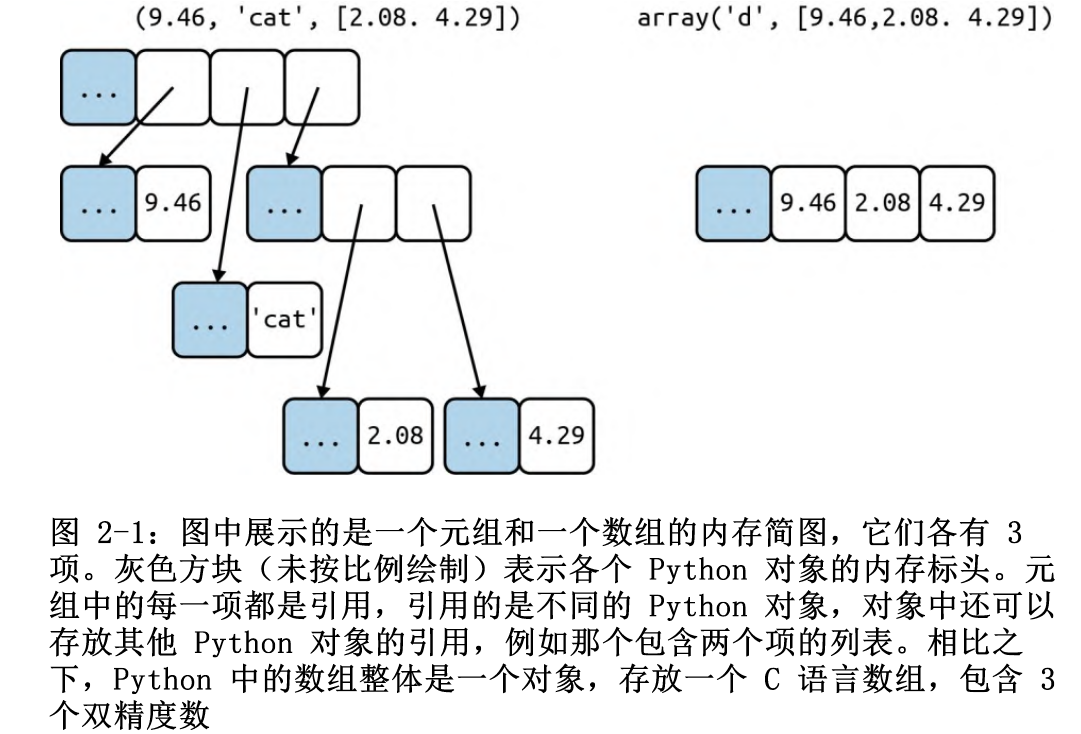

### 可变/不可变序列
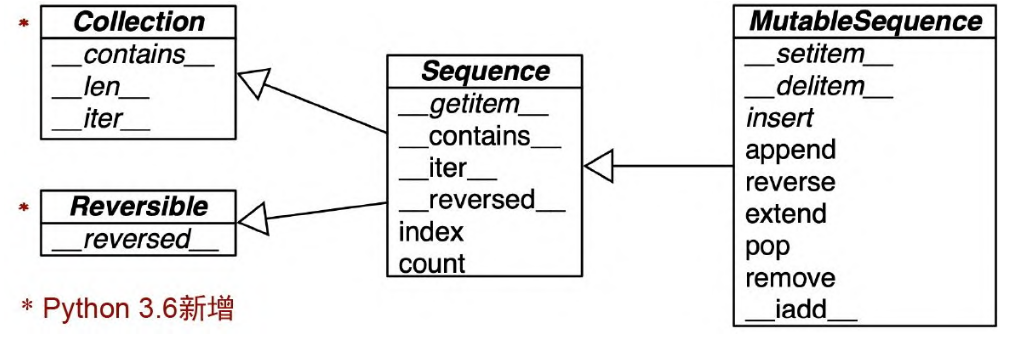

### 列表推导式(listcomps)与生成器表达式(genexps)
虽然列表推导式也可以生成元组、数组或其他类型的序列，但是生成器表达式占用的内存更少，因为生成器表达式使用迭代器协议逐个产出项，而不是构建整个列表提供给其它构造函数。

In [2]:
symbols = '$¢£¥€¤'
t = (ord(symbol) for symbol in symbols)
t

<generator object <genexpr> at 0x0000013F32118860>

In [3]:
tuple(t)

(36, 162, 163, 165, 8364, 164)

In [4]:
import array
a = array.array('I', (ord(symbol) for symbol in symbols))
a

array('I', [36, 162, 163, 165, 8364, 164])

In [7]:
colors = ['black', 'white']
sizes = ['S', 'L', 'M']

for tshirt in (f'{c} {s}' for c in colors for s in sizes):
    print(tshirt)

black S
black L
black M
white S
white L
white M


In [8]:
colors = ['black', 'white']
sizes = ['S', 'L', 'M']

for tshirt in [f'{c} {s}' for c in colors for s in sizes]:
    print(tshirt)

black S
black L
black M
white S
white L
white M


### 元组用作记录
用元组存放记录,元组中的一项对应一个字段的数据,项的位置决定数据的意义。

In [11]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32_450, 0.66, 8016)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'),('ESP', 'XDA205856')]
for passport in sorted(traveler_ids):
    print(f'{passport[0]}/{passport[1]}')


BRA/CE342567
ESP/XDA205856
USA/31195855


### 元组的不可变性
advantage：
- 只要在源码中见到元组,你就知道它的长度永不可变。
- 长度相同的元组和列表,元组占用的内存更少,而且 Python 可对 元组做些优化。

元组的不可变性仅针对元组中的引用，其引用不可删除，不可替换。若引用的是可变对象，改动对象后，元组的值会发生变化

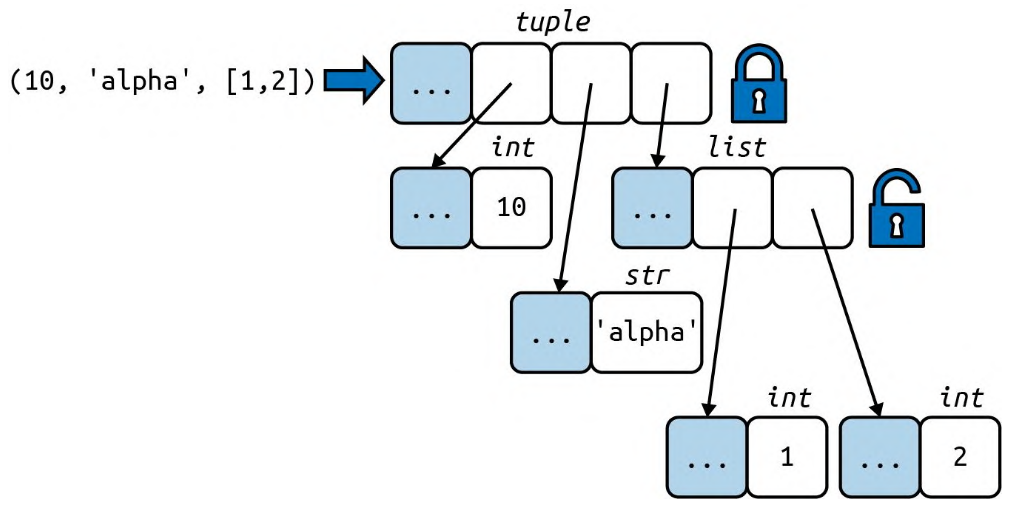

In [14]:
a = (10, 'alpha', [1,2])
b= (10,'alpha', [1,2])
a == b

True

In [16]:
b[-1].append(3)
b == a

False

可以定义如下函数判断对象的值是否固定

In [18]:
def fixed(o):
    try:
        hash(o)
    except TypeError:
        return False
    return True

a = (10, 'alpha', [1,2])
b= (10,'alpha', (1,2))
fixed(b)

True

In [24]:
print(tuple(reversed(b)))
b

((1, 2), 'alpha', 10)


(10, 'alpha', (1, 2))

### 元组相比于列表的优势
- Python 编译器求解元组字面量时,经过一次操作即可生成元组常量 的字节码。求解列表字面量时,生成的字节码将每个元素当作独立 的常量推入数据栈,然后构建列表。
- 给定一个元组 t,tuple(t) 直接返回 t 的引用,不涉及复制。  相比之下,给定一个列表 l,list(l) 创建 l 的副本。
- tuple 实例长度固定,分配的内存空间正好够用。而 list 实例  的内存空间要富余一些,时刻准备追加元素。
- 对元组中项的引用存储在元组结构体内的一个数组中,而列表把引 用数组的指针存储在别处。二者不存储在同一个地方的原因是列表 可以变长,一旦超出当前分配的空间,Python 就需要重新分配引用 数组来腾出空间,而这会导致 CPU 缓存效率较低。

#### 嵌套拆包


In [31]:
metro_areas = [ ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
                ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
                ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
                ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
                ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)), 
]
def main():
    print(f'{"":15} | {"latitude":>9} | {'longitude':>9}')
    for name, _, _, (lat, lon) in metro_areas:
        if lon <= 0:
            print(f'{name:15} | {lat:>9.4f} | {lon:>9.4f}')

main()

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo      |  -23.5478 |  -46.6358


### 模式匹配
match-case支持析构.一个 case 子句由两部分组成:一部分是模式,另一部分是使用 if  关键字指定的卫语句(guard clause,可选)

一般来说,匹配对象同时满足以下条件方能匹配序列模式。序列模式可以匹配 `ollections.abc.Sequence` 的多数实际子类或 虚拟子类的实例,但 `str`、`bytes` 和 `bytearray` 除外
- 匹配对象是序列。
- 匹配对象和模式的项数相等。
- 对应的项相互匹配,包括嵌套的项。

在 `match/case` 上下文中,`str`、`bytes` 和 `bytearray` 实例不作为序列处理。`match` 把这些类型视为“原子”值,就像整  数 `987` 整体被视为一个值,而不是数字序列。倘若把这三种类型视 为序列,就可能会由于意外匹配而导致 bug。如果想把这些类型的 对象视为序列,则要在 `match` 子句中转换.

标准库中的以下类型与序列模式兼容。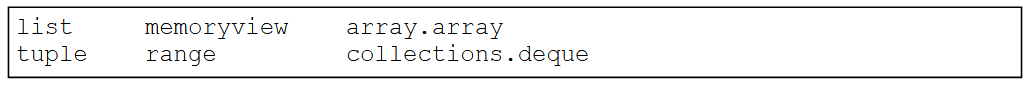

`_` 符号在模式中有特殊意义:匹配相应位置上的任何一项,但不绑定匹  配项的值。另外,`_` 是唯一可在模式中多次出现的变量。模式中的任何一部分均可使用 as 关键字绑定到变量上。
```
case [name, _, _, (lat, lon) as coord]:
```

In [ ]:
class Robot:
    def handle_command(self,message):
        match message:
            case ['BEEPER',frequency,times]:
                self.beep(times, frequency)
            case ['NECK',angle]:
                self.rotate_neck(angle)
            case ['LED', ident, itensity]:
                self.leds[ident].set_color(ident, red, green, blue)
            case _:
                raise IncalidCommand(message)

In [1]:
metro_areas = [ ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
                ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
                ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
                ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
                ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)), 
]
def main():
    print(f'{"":15} | {"latitude":>9} | {'longitude':>9}')
    for record in metro_areas:
        match record:
            case  [name,_,_,(lat, lon)] if lon <= 0:
                print(f'{name:15} | {lat:>9.4f} | {lon:>9.4f}')

main()

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo      |  -23.5478 |  -46.6358


In [ ]:
match tuple(phone):
    case ['1',*rest]:
        ...
    case ['2|3',*rest]:
        ...
    case _:
        ...

添加类型信息可以让模式更具体。例如,下面的模式与前面的示例匹配 相同的嵌套序列结构,不过第一项必须是 `str` 实例,而且二元组中的两  项必须是 `float` 实例。

`case [str(name), _, _, (float(lat), float(lon))]:`

表达式 str(name) 和 float(lat) 看起来像是构造函数 调用——前者把 name 转换成 str,后者把 lat 转换成  float。其实不然,在模式上下文中,这种句法的作用是在运行时  检查类型。前面的模式将匹配一个 4 项序列,其中第一项必须是一 个字符串,第四项必须是一对浮点数。而且,第一项中的字符串将 绑定到 name 变量上,第四项中的一对浮点数将分别绑定到 lat  和 lon 两个变量上。因此,尽管 str(name) 借用了构造函数调  用句法,但是在模式上下文中,语义是完全不同的。

SyntaxError: invalid syntax (3764696302.py, line 1)

In [5]:
from lis import parse
parse('(gcd 18 45)')


['gcd', 18, 45]

In [6]:
parse('''(define duoble
      (lambda (n)
      (* n 2)))
''')

['define', 'duoble', ['lambda', ['n'], ['*', 'n', 2]]]

### silce

为了求解表达式 `seq[start:stop:step]`,Python 调用 `seq.__getitem__(slice(start, stop, step))`

`[]` 运算符还可以接受多个索引或切片,以逗号分隔。负责处理 `[]` 运  算符的特殊方法 `__getitem__` 和 `__setitem__` 把接收到的 `a[i, j]` 中的索引当作元组。也就是说,为了求解 `a[i, j]`,Python 调用  `a.__getitem__((i, j))`。

In [7]:
invole = """
0.....6.................................40........52...55........
1909  Pimoroni PiBrella                     $17.50    3    $52.50
1489  6mm Tactile Switch x20                 $4.95    2     $9.90
1510  Panavise Jr. - PV-201                 $28.00    1    $28.00
1601  PiTFT Mini Kit 320x240                $34.95    1    $34.95
"""
SKU =slice(0,6)
DESCRIPTION = slice(6,40)
UNIT_PRICE =slice(40,52)
QUANTITY = slice(52,55)
ITEM_TOTAL = slice(55,None)
line_items = invole.split('\n')[2:]
for item in line_items:
    print(f'{item[UNIT_PRICE]}  {item[DESCRIPTION]}')

    $17.50    Pimoroni PiBrella                 
     $4.95    6mm Tactile Switch x20            
    $28.00    Panavise Jr. - PV-201             
    $34.95    PiTFT Mini Kit 320x240            
  


如果赋值目标是一个切片,则右边必须是一个可迭代对象,即使只有 一项。

In [9]:
L =[1,2]
L[1:None] = [1]

+ and *

序列的加法和乘法始终创建一个新对象。

创建嵌套列表时，列表本质上是一串引用，因此利用+。*创建的列表内部的列表是相同的，因为具有相同的引用.若想让内部的列表不同，则每个列表应当重新创建，以使其具有不同引用。

In [11]:
L
L *2

[1, 1, 1, 1]

In [13]:
l = [['_','_','_']]*3
l

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [14]:
l[0][1] = 'x'
l

[['_', 'x', '_'], ['_', 'x', '_'], ['_', 'x', '_']]

In [15]:
l = [['-','-','-'] for _ in range(3)]
l

[['-', '-', '-'], ['-', '-', '-'], ['-', '-', '-']]

In [17]:
l[0][1] = 'x'
l

[['-', 'x', '-'], ['-', '-', '-'], ['-', '-', '-']]

### 增量赋值序列

`+=` --->`__iadd__`：in-place add, 如果没有实现`__add__`则调用`__add__`.

对于可变序列，就地操作。若无`__add__`则`a += b`=`a = a + b`.

In [18]:
l = [1,2,3]
id(l)

1478913031296

In [19]:
l *= 2
print(l)
id(l)

[1, 2, 3, 1, 2, 3]


1478913031296

In [20]:
t = (1,2,3)
id(t)

1478913061760

In [21]:
t *= 2
print(t)
id(t)

(1, 2, 3, 1, 2, 3)


1478912152224

### list.sort and build-in function sorted
`list.sort` 方法就地排序列表,即不创建副本。返回值为 None,目的  就是提醒我们,它更改了接收者, 没有创建新列表。这是 Python API 的一个重要约定:就地更改对象的函数或方法应该返回 None,让  调用方清楚地知道接收者已被更改,没有创建新对象.接收者是方法调用的目标,即方法定义体中绑定到 self 上的对象

内置函数 sorted 返回创建的新列表。该函数接受任何可迭  代对象作为参数,包括不可变序列和生成器. ***无论传入什么类型的可迭代对象,sorted 函数始终返回新创建的列表。***

### 数组
若列表只包含数值，则`array.array`更高效，其支持所有可变序列的操作，还有快速加载项和保存项方法。实际上，一个由 float  值构成的数组,存放的并不是完整的 float 实例,而是表示相应机器 值的压缩字节。

In [ ]:
from array import array
from random import random
floats = array('d', (random() for _ in range(10**7)))
# 生成器表达式而不是列表推导，防止占用过大内存
floats[-1]

0.9824071678444474

In [23]:
fp = open('floats.bin','wb')
floats.tofile(fp)
fp.close()
floats2 = array('d')
fp = open('floats.bin','rb')
floats2.fromfile(fp,10**7)
fp.close()
floats2[-1]

0.9824071678444474

使用  `array.fromfile` 从 `array.tofile` 创建的二进制文件中加载 1000 万个双精度浮点数,用时大约 0.1 秒。这比从文本文件中读取快了近 60 倍,而且无须使用内置函数 float 解析每一行。`array.tofile`  保存文件的速度约比一行一个浮点数写入文本文件快 7
 倍。此外,保存 1000 万个双精度浮点数的二进制文件占 80 000 000 字节(一个双精度 浮点数占 8 字节,零开销),而保存相同数据量的文本文件占 181 515 739 字节。

### memoryview
内置的 memoryview 类是一种共享内存的序列类型,可在不复制字节的情况下处理数组的切片。这对大型数据集来说非常重要.

In [24]:
from array import array
octets =array('B', range(6))
ml = memoryview(octets)
ml

In [25]:
ml.tolist()

[0, 1, 2, 3, 4, 5]

In [29]:
m2 =ml.cast('B',[2,3])
m2.tolist()


[[0, 1, 2], [3, 4, 5]]

In [32]:
m3 = ml.cast('B', [3,2])
m3.tolist()

[[0, 1], [2, 3], [4, 5]]

In [34]:
m2[1,1]=22
m3[1,1]=33
octets

array('B', [0, 1, 2, 33, 22, 5])

In [38]:
m3.tolist()

[[0, 1], [2, 33], [22, 5]]

### Numpy
`a.shape`--->in-place

`a.reshape`--->create new ndarray

In [54]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [55]:
print(type(a))
print(a.shape)
a.shape=3,4
a


<class 'numpy.ndarray'>
(12,)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
a.transpose()# create new array


array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

### 双端列表


In [75]:
from collections import deque
dq = deque(range(10),maxlen=10)
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)

In [76]:
dq.rotate(3)
dq

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6], maxlen=10)

In [77]:
dq.rotate(-4)
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 0], maxlen=10)

In [78]:
dq.append(00)
dq

deque([2, 3, 4, 5, 6, 7, 8, 9, 0, 0], maxlen=10)

In [79]:
dq.appendleft(0)
dq

deque([0, 2, 3, 4, 5, 6, 7, 8, 9, 0], maxlen=10)

In [80]:
dq.extend([1,2,3])
dq

deque([4, 5, 6, 7, 8, 9, 0, 1, 2, 3], maxlen=10)